## 3. Landing on all the buttons.

If instead of finding where the most likely button the knight will be on after $n$ number of moves, we want to find the probability that the knight has landed on at least half of the buttons on the keypad after $n$ moves, or on all the buttons of the keypad after $n$ moves. We cannot use the previous method of adjacency matrix multiplication because it does not record the history of the knight movements. We begin by showing how to solve the problem for the case of traversing all the buttons for, first, when no backtracking is allowed, then when backtracking or random movement is allowed.<br>
An application of this is using the graph representing a network to calculate the probability that everyone will receive the same news after a specific amount of time.

### 3.1 Landing on all the buttons without backtracking.

In the previous sections, we were interested in the probability of going from $v_j$ to $v_i$ after $n$ steps.  But just as important, we should look at the possibility of the knight chess piece going through all the buttons on the keypad or just the digit buttons. If the knight cannot go back to buttons it has already visited, then for a knight starting at **0** the minimum number of steps to accomplish this for all the buttons is $n= 11$, and for just the digit buttons  $n= 10$, since the knight needs to step on either ** '*' ** or ** '#' ** before getting to ** '5' **.

We revisualize our previous graph to make it easier to see the vertex-spanning or **"Hamilton"** path.

![title](img/FX5.png)

The Hamilton path **(0, 4, 3, 8, 1, 6, 7, #, 5, *, 9, 2)** and the corresponding knight movements on the keypad are shown.  From the graph it is easy to see that all Hamilton paths, regardless of starting vertex, must contain exactly one of **{(6,7),(4,9)}** . If it excludes both these edges then it would be impossible to get from the left side to the right side of the graph, and if both edges are included then the vertices **2** or **0** would be excluded.

> The Hamilton paths starting at **0** going through **(6,7)** are:
 **(0, 4, 3, 8, 1, 6, 7, #, 5, *, 9, 2)** and **(0, 4, 3, 8, 1, 6, 7, 2, 9, *, 5, #)**<br>
 The Hamilton paths starting at **0** going through **(4,9)** are:
 **(0, 6, 1, 8, 3, 4, 9, *, 5, #, 7, 2 )** and **(0, 6, 1, 8, 3, 4, 9, 2, 7, #, 5,*)**

For going through all the buttons starting from **0** after 11 steps, there are 4 possible Hamiliton paths and the total number of possible paths from **0** after 11 steps is 18326. So the probability of going through all the buttons is $\frac{4}{18326}=2.1827\times 10^{-4} \approx 0.022\%$

For going through only the digit buttons starting from **0** after 10 steps, there are 2 possible Hamiliton paths and the total number of possible paths from **0** after 10 steps is 7540. So the probability of going through all the digit buttons is $\frac{2}{7540}=2.6525\times 10^{-4}\approx 0.027\%$

The probability for both cases are extremely small. There are only four more Hamilton paths in the graph.   

> The Hamilton paths *not* starting at **0** going through **(6,7)** are:
 **(3, 8, 1, 6, 0, 4, 9, *, 5, #, 7, 2)** and **(3, 8, 1, 6, 0, 4, 9, 2, 7, #, 5, *)**<br>
 The Hamilton paths *not* starting at **0** going through **(4,9)** are:
 **(1, 8, 3, 4, 0, 6, 7, 2, 9, *, 5, #)** and **(1, 8, 3, 4, 0, 6, 7, #, 5, *, 9, 2)**

So there are no Hamilton paths starting or ending at the vertices **{4, 5, 6, 7, 8, 9}**.  If the starting vertex is any of them then it would require more steps and backtracking to cover all the required vertices.  

If we have two knights starting at two different positions and if the first knight is placed on any button on the left side of the graph **{0, 1, 3, 4, 6, 8}** and the second on any on the right side **{2, 5, 7, 9, *, #}** then the minimum number of steps to cover all the button is 5 since each knight can cover a distinct set of 6 vertices in 5 steps.   

If we choose the two starting positions **0** and **2**, then<br>
$\quad\quad\quad$from **0** there are two paths of lenght 5 covering the left side **(0, 6, 1, 8, 3, 4)** and **(0, 4, 3, 8, 1, 6)** <br> 
$\quad\quad\quad$from **2** there are two paths of lenght 5 covering the left side **(2, 7, #, 5, *, 9)** and **(2, 9, *, 5, #, 7)**<br>
$\quad\quad\quad\quad\quad\quad$ and <br>
$\quad\quad\quad$from **0** path **(0, 4, 9, *, 5, #)** and from **2** path **(2, 7, 6, 1, 8, 3)** <br>
$\quad\quad\quad\quad\quad\quad$ and <br>
$\quad\quad\quad$from **0** path **(0, 6, 7, #, 5, *)** and from **2** path **(2, 9, 4, 3, 8, 1)**.

The probability of covering all the vertices with a knight starting at **0** and **2** after 5 steps is:

$$\frac{(2 \times 2)+(1 \times 1)+(1 \times 1)}{\tau(0,5)\times \tau(2,5)}
\quad\text{ where }  \tau(i,n) 
\text{ is the total number of paths starting from } i \text{ after } n \text{ steps}$$

From our previous results in section 1 and by symmetry of the graph $\tau(0,5)=\tau(2,5)=86$, so the above probability is  $8.1125 \times 10^{-4}\approx 0.081\%$  which is higher than using only one starting vertex, either **0** or **2**, after more than twice the number of steps.   

$\quad$

### 3.2 Landing on all the buttons with backtracking.

From **3.1** we see that the path starting at **0** cannot contain only the vertices in the set **{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}**.

For paths covering only two vertices, there are two possibilities: **{0,4}** and **{0,6}**. The path associated with each set is simply oscillating between the two vertices in the set over successive steps.  

For paths covering 3 vertices, there are 5 possibilities: **{0, 1, 6}** ,**{0, 3, 4}** ,**{0, 4, 6}** ,**{0, 4, 9}** , and **{0, 6, 7}**.

For paths starting at vertex $v_0$ covering $m$ vertices where $m \le |V|$ and $V$ is the vertex set of the graph $G$,<br>  $V_\alpha \subset V$ is a valid subset containing path vertices if
$$ \forall v_i \in V_\alpha, \exists v_j \in V_\alpha \quad\text{such that  } (v_i,v_j) \text{  is an edge }\in G$$

So $V_\alpha$ consists of all vertex sets specifying a tree rooted at $v_0$ in $G$.

The path vertex trees can be labelled by $T(i,j)$ where $i+1$ is the number of vertices and $j$ is the tree number and $K(i)$ gives the total number of trees with $i+1$ vertices or $i$ edges.  By definition $T(0,0)$ is the root of the tree.  This is illutrated below for the vertex subsets just described. 

![title](img\GX1.png)

Unlike the adjacency matrix $M$ calculations in **3.1** and **3.2** which give information related to the start and end of a path, calculations using trees $T(i,j)$ give the history of a path, specifying which vertices it has visited.  This is well-suited for calculating the probabilty that a random path of length $n$ has covered all or half of the vertices in $G$ starting from $v_0$.

We can find all the trees $T(i,j)$ on a graph by a **DFS** (**D**epth-**F**irst **S**earch) algorithm.  The code is given in the subroutine TREE in **4. Programming codes**.  The results for our knight-keypad problem are in the table below where **#** is labelled 11 and ** * ** is 10. *The programs are run, then the results are stored in a csv file which can be imported into a Pandas Dataframe.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Tree=pd.read_csv('TREE.csv')
pd.set_option('max_colwidth', 125)
Tree

,i,K(i),"T(i,j),j=0,1,...,K(i)-1"
0,0,1.0,{0}
1,1,2.0,"{0, 4}, {0, 6}"
2,2,5.0,"{0, 4, 6}, {0, 3, 4}, {0, 9, 4}, {0, 1, 6}, {0, 6, 7}"
3,3,12.0,"{0, 3, 4, 6}, {0, 9, 4, 6}, {0, 1, 4, 6}, {0, 4, 6, 7}, {0, 8, 3, 4}, {0, 9, 3, 4}, {0, 9, 2, 4}, {0, 9, 10, 4}, {0, 1, ..."
4,4,26.0,"{0, 8, 3, 4, 6}, {0, 9, 3, 4, 6}, {0, 1, 3, 4, 6}, {0, 3, 4, 6, 7}, {0, 9, 2, 4, 6}, {0, 9, 10, 4, 6}, {0, 9, 4, 6, 1}, ..."
5,5,44.0,"{0, 1, 3, 4, 6, 8}, {0, 3, 4, 6, 8, 9}, {0, 3, 4, 6, 7, 8}, {0, 2, 3, 4, 6, 9}, {0, 3, 4, 6, 9, 10}, {0, 1, 3, 4, 6, 9},..."
6,6,68.0,"{0, 1, 3, 4, 6, 8, 9}, {0, 1, 3, 4, 6, 7, 8}, {0, 3, 4, 6, 7, 8, 9}, {0, 2, 3, 4, 6, 8, 9}, {0, 3, 4, 6, 8, 9, 10}, {0, ..."
7,7,76.0,"{0, 1, 3, 4, 6, 7, 8, 9}, {0, 1, 2, 3, 4, 6, 8, 9}, {0, 1, 3, 4, 6, 8, 9, 10}, {0, 1, 2, 3, 4, 6, 7, 8}, {0, 1, 3, 4, 6,..."
8,8,67.0,"{0, 1, 2, 3, 4, 6, 7, 8, 9}, {0, 1, 3, 4, 6, 7, 8, 9, 11}, {0, 1, 3, 4, 6, 7, 8, 9, 10}, {0, 1, 2, 3, 4, 6, 8, 9, 10}, {..."
9,9,41.0,"{0, 1, 2, 3, 4, 6, 7, 8, 9, 11}, {0, 1, 2, 3, 4, 6, 7, 8, 9, 10}, {0, 1, 3, 4, 6, 7, 8, 9, 10, 11}, {0, 1, 3, 4, 5, 6, 7..."


Each path traced out by the knight on the keypad can be characterized by a triple index $(i,j,k)$ where<br>
> $i=$ the number of buttons or vertices covered by the path,<br>
$j=$ the tree $T(i,j)$ specifying all the distinct buttons or the vertex set of the path,<br>
$k=$ the last button or the end vertex of the path and $\{ k \} \in T(i,j)$.

We use $(i,j,k)_n$ to mean $(T(i,j),k)_n$ where $n$ is the number of steps the path has taken.

$$\begin{matrix}
\text{path}(0,4,0,6,0,4)_5\quad \Longleftrightarrow \quad (2,0,4)_5 \\
\text{{path}}=\{ 0,4,6 \}=T(2,0)\quad \text{end vertex}=4\\
\end{matrix}$$ 


At each step $n$, the path $(T(i,j),k)_n$ is either:<br>
1. backtracking to another vertex in $T(i,j)\quad\Longrightarrow\quad (T(i,j),k_\alpha)_{n+1} $
2. moving to a vertex not in $T(i,j)$ and increasing the vertex set by one
$\quad\Longrightarrow\quad (T(i+1,j_\beta),k_\alpha)_{n+1} $<br>
where $(k,k_\alpha)\in$ edge of $G$.

![title](img\GX2.png)

Reversing the process, each path $(T(i,j),k)_n$ is the result from:
1. the same tree vertex set $T(i,j) \quad\Longleftarrow\quad (T(i,j),k_\alpha)_{n-1}$
2. the next smaller vertex set $T(i-1,j_\beta)\quad\Longleftarrow\quad (T(i-1,j_\beta),k_\alpha)_{n-1}$<br>
where $(k,k_\alpha)\in$ edge of $G\quad$ and $\quad T(i-1,j_\beta)\cup\{ k \}=T(i,j)$.

![title](img\GX3.png)

We define <br>
> $c(i,j,k)_n$ the total number of $(T(i,j),k)_n$ paths at $n$ steps,<br><br>
$A(i,j)_n=\sum\limits_{k=0}^{N-1} c(i,j,k)_n$ the total number of $(T(i,j))_n$ paths,<br><br>
$B(i)_n=\sum\limits_{j=0}^{K(i)-1} A(i,j)_n$ the total number of paths with $(i+1)$ vertices,<br><br>
$Sum_n=\sum\limits_{1=0}^{N-1} B(i)_n$ the total number of all possible paths,<br><br>
$p(i)_n=\frac{B(i)_n}{Sum_n}$ the probability that the path has covered exactly $(i+1)$ vertices.


Given $c(i,j,k)_{n-1}$ we can calculate $c(i,j,k)_{n}$at the next step by applying the $n$ from $n-1$ procedure described above. The entire procedure can be visualized as a neural-network algorithm where the calculation at any level is only influenced by those at the same level or the level directly below it.

![title](img\GX4.png)

The codes for finding the probabilities $p(i)$ are given in the subroutine GROW_1 in **4. Programming codes.** It is run with Nstep = 50.  The results are stored in GROW_1.csv.  Below are the tabulated results for the first 11 steps, confirming our result in **3.1** where all 12 vertices are first covered after 11 steps and the probability that was calculated earlier. 

In [3]:
Grow=pd.read_csv('GROW_1.csv')
Grow.head(12)

,n,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,# paths
0,0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,1,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
2,2,0.0,0.333333,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.0
3,3,0.0,0.142857,0.428571,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.0
4,4,0.0,0.055556,0.388889,0.388889,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.0
5,5,0.0,0.023256,0.209302,0.418605,0.255814,0.093023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.0
6,6,0.0,0.009346,0.158879,0.364486,0.299065,0.130841,0.037383,0.000000,0.000000,0.000000,0.000000,0.000000,214.0
7,7,0.0,0.003876,0.081395,0.282946,0.329457,0.220930,0.058140,0.023256,0.000000,0.000000,0.000000,0.000000,516.0
8,8,0.0,0.001575,0.058268,0.239370,0.313386,0.242520,0.107087,0.031496,0.006299,0.000000,0.000000,0.000000,1270.0
9,9,0.0,0.000650,0.029240,0.163093,0.292398,0.289799,0.141650,0.066927,0.014295,0.001949,0.000000,0.000000,3078.0


Plotting the probability results for paths starting at **0** reaching 50 steps:

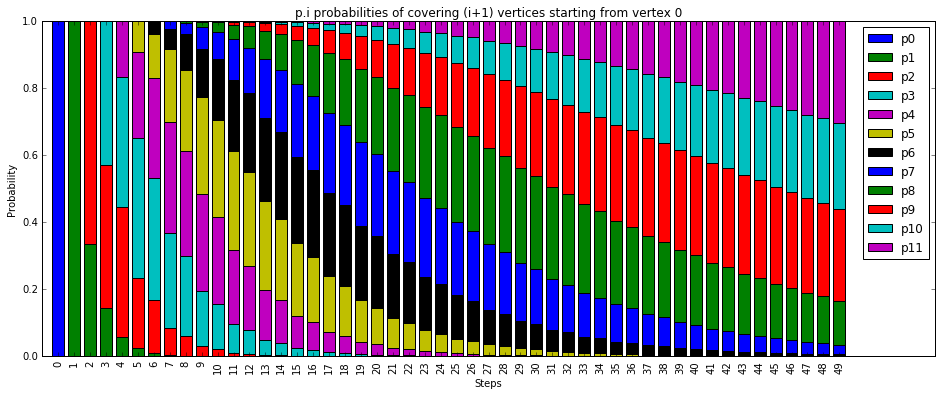

In [30]:
Grow[['p0','p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11']
    ].plot.bar(figsize=(16,6),stacked=True,ylim=(0,1),width=0.75).set_xlim([-1,55])
plt.title('p.i probabilities of covering (i+1) vertices starting from vertex 0')
plt.xlabel('Steps')
plt.ylabel('Probability')


As $n \to\infty$ , the number of steps gets very large,  $p(i) \to 0$ for $i=0,1,...,10$  and $p(11) \to 1.0$.  This is expected since if the knight is moving randomly over the keypad over an infinite amount of time, it will eventually cover all the buttons on the keypad. 

To calculate the probability that the knight has covered at least half the buttons on the keypad at $n$ steps, we add the probabilities for $p(5), p(6), ..., p(11)$. The comparison between covering all and half the keypad buttons are shown below.

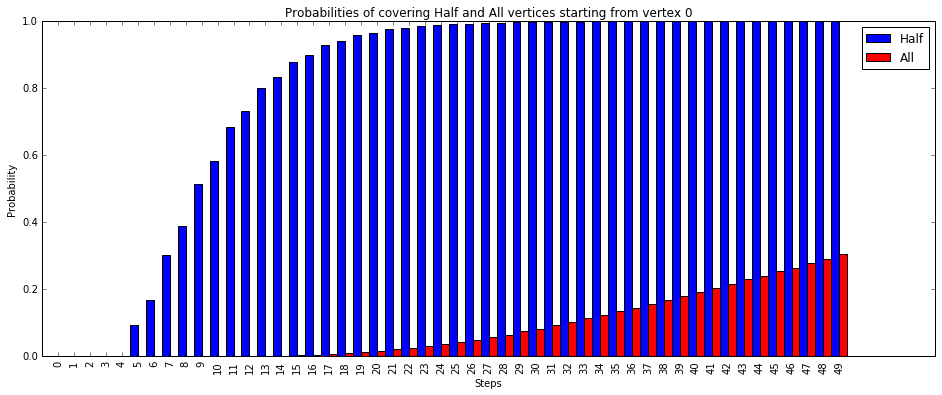

In [31]:
Grow['All']=Grow['p11']
Grow['Half']=Grow['p5']+Grow['p6']+Grow['p7']+Grow['p8']+Grow['p9']+Grow['p10']+Grow['p11']
Grow[['Half','All']].plot.bar(figsize=(16,6),color=['blue','red'],ylim=(0,1),width=1).set_xlim([-1,55])
plt.title('Probabilities of covering Half and All vertices starting from vertex 0')
plt.xlabel('Steps')
plt.ylabel('Probability')


We see that after about 25 steps, the knight would have covered at least half the buttons on the keypad. This can also be seen in the first plot, but it is more obvious in the second plot.

### Conclusions

We represent the movement of the knight on the keypad as random walks in the associated graph $G$ where moving from one vertex to its adjacent vertices is equally likely.  From this we construct a set of trees $T(i,j)$ which gives all possible vertex-covering for paths originating from some root vertex.  We then specify a neural-network algorithm on $c(i,j,k)$, the number of paths associated with $T(i,j)$ with end vertex $k$, to find $p(i)$, the probability the path has traversed $i+1$ vertices after a fixed number of steps.

The method can be modified to find the probability the knight has visited only the digit buttons or any other subset of the buttons on the keypad.  It can also be used to find the probability of landing on a particular button a fixed number of times.

We can apply the same technique for when two knights are placed on the keypad. *I have ran a program involving the use of 2 knights but have not included it becuase it is only a slight modiication of the program for one knight and the results are not that interesting.*

Applications can include:
1. For a network of people in regular contact, what is the probability that a certain portion fo the network would know of an event if the announcement originates from an individual or several people in the network?
2. Find the optimal initial condition so that the probability of covering the entire or specific portion of the network is maximized.
3. Construction of a network meeting specific requirement when each node in the network can have only so many connection.  How to maximize the efficiency of the network while minimizing the number of node connections?